In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
Univ = pd.read_csv("Universities.csv")

In [3]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Univ_df = scaler.fit_transform(Univ.iloc[:,1:])

In [ ]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

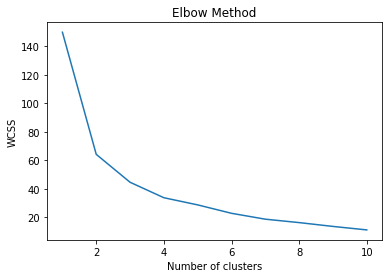

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_Univ_df)

KMeans(n_clusters=4, random_state=42)

In [6]:
clusters_new.labels_

array([0, 3, 2, 0, 2, 0, 0, 2, 0, 3, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0], dtype=int32)

In [7]:
#Assign clusters to the data set
Univ['clusterid_new'] = clusters_new.labels_

In [8]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 0.80273428,  0.68086062, -0.90136381, -0.43159988,  0.44062556,
         0.79526289],
       [-1.93029211, -1.98148647,  1.59348244,  1.63857398, -1.23359906,
        -1.68680366],
       [-0.12658888,  0.06407139,  0.2224667 ,  0.04516743, -0.38064332,
         0.02028221],
       [ 0.88122441,  0.5787432 , -0.24316128, -1.56078563,  2.38759968,
        -0.3064867 ]])

In [11]:
Univ.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1351.666667,89.444444,21.777778,11.00,33615.555556,93.777778
1,1,1061.500000,38.750000,70.000000,19.25,9953.000000,71.750000
2,2,1253.000000,77.700000,43.500000,12.90,22008.200000,86.900000
3,3,1360.000000,87.500000,34.500000,6.50,61133.000000,84.000000


In [9]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,3
